In [37]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork')

/var/folders/9r/7zhcsk9d5xg9xlmmqf14l1hc0000gn/T/ipykernel_48409/1838952024.py:636: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  data3,data1,p,x1,y1,standford = run(filename,date,begin,end,st_num=8)
/var/folders/9r/7zhcsk9d5xg9xlmmqf14l1hc0000gn/T/ipykernel_48409/1838952024.py:659: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
/var/folders/9r/7zhcsk9d5xg9xlmmqf14l1hc0000gn/T/ipykernel_48409/1838952024.py:684: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
/var/folders/9r/7zhcsk9d5xg9xlmmqf14l1hc0000gn/T/ipykernel_48409/1838952024.py:700: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
/var/fo

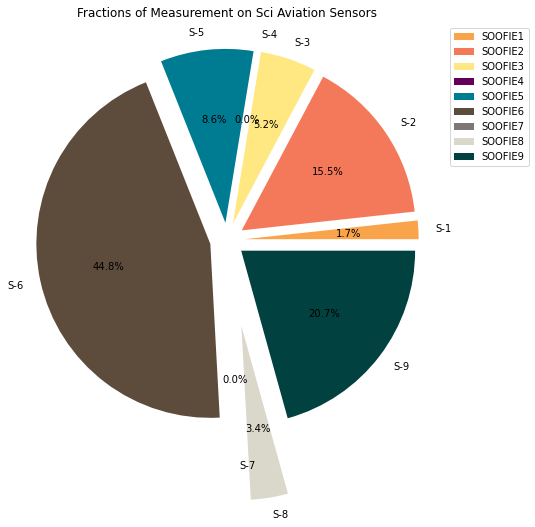

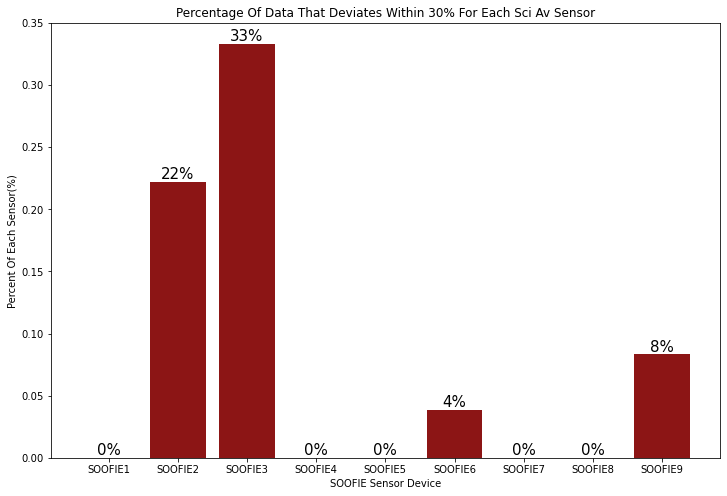

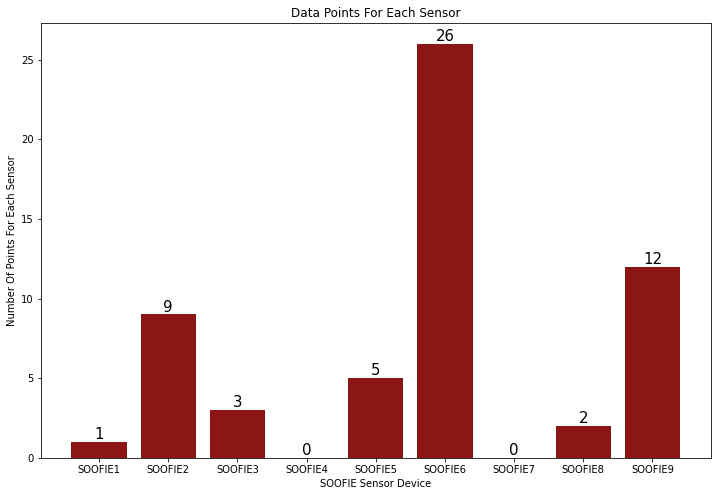

In [1]:
# model 1
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import statsmodels.api as sm 
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Latex
import math
from scipy.odr import *
%matplotlib inline

def draw_n(time,data1,data2,data3,date,standford,p):
    '''
    Plot a graph of the three types of data,
    Input parameters:
    data1: Sci Av Volume
    data2: Wind Direction
    data3: Standford Release Volume
    date: date the data was entered
    standford:The input Sci Av Volume data is judged by which device is measured.
    p: the percent of miss data(15min Sci Av Volume data)
    '''
    fig = plt.figure(figsize=(10,4)) 
    ax_1 = HostAxes(fig, [0, 0, 1, 0.9])  #[left, bottom, weight, height] axes，0 <= l,b,w,h <= 1

    #parasite addtional axes, share x
    ax_2 = ParasiteAxes(ax_1, sharex=ax_1)
    ax_3 = ParasiteAxes(ax_1, sharex=ax_1)

    #append axes
    ax_1.parasites.append(ax_2)
    ax_1.parasites.append(ax_3)

    #invisible right axis of ax_1
    ax_1.axis['right'].set_visible(False)
    ax_1.axis['top'].set_visible(False)
    ax_2.axis['right'].set_visible(True)
    ax_2.axis['right'].major_ticklabels.set_visible(True)
    ax_2.axis['right'].label.set_visible(True)

    #set label for axis
    ax_1.set_ylabel(r"Sci Av Volume $(kg/hour)$")
    ax_1.set_xlabel(date)
    ax_2.set_ylabel('Wind Direction ($^\circ$)')
    ax_3.set_ylabel('Standford Release Volume(kg/hour)')

    load_axisline = ax_3.get_grid_helper().new_fixed_axis

    ax_3.axis['right2'] = load_axisline(loc='left', axes=ax_3, offset=(-50,0))

    fig.add_axes(ax_1)

    tickvalues = range(len(time))
    v = len(time)//10
    tickvalues_x = [tickvalues[i*v] for i in range(10)]
    time_x = [time[i*v] for i in range(10)]
    curve_1, = ax_1.plot(tickvalues, data1, label="Sci Av Volume(the percent of miss data:{0}%)".format(round(p*100,2)), color='black')
    curve_2, = ax_2.plot(tickvalues, data2, label="Wind Direction",alpha=0.2, color='blue')
    curve_3, = ax_3.plot(tickvalues, data3, label="Standford Release Volume", color='#8C1515')
    #Draw a device scatter plot for Sci Av Volume.
    #Different devices use different colors
    colors = ['#F9A44A','#F4795B','#FFE781','#620059','#007C92','#5D4B3C','#7F7776','#DAD7CB','#014240']
    markers = ['o','v','s','p','*','D','<','>','X']
    labels = [] #equipment label
    for i in range(1,10):
        labels.append('standford-'+str(i))
    for i in range(0,9):
        ax_1.scatter(tickvalues,standford[i],label = labels[i],color = colors[i],marker = markers[i],s=100)
    plt.xticks(tickvalues_x,time_x)


    ax_1.legend(loc='upper left', bbox_to_anchor=(1.06,1.0),borderaxespad = 0.)

    ax_2.axis['right'].label.set_color('blue')
    ax_3.axis['right2'].label.set_color('#8C1515')

    ax_2.axis['right'].major_ticks.set_color('blue')
    ax_3.axis['right2'].major_ticks.set_color('#8C1515')

    ax_2.axis['right'].major_ticklabels.set_color('blue')
    ax_3.axis['right2'].major_ticklabels.set_color('#8C1515')

    ax_2.axis['right'].line.set_color('blue')
    ax_3.axis['right2'].line.set_color('#8C1515')

    plt.show()
    
def draw_same_axis(time,data1,data2,data3,date,standford,p):
    '''
    Plot a graph of the three types of data,
    Input parameters:
    data1: Sci Av Volume
    data2: Wind Direction
    data3: Standford Release Volume
    date: date the data was entered
    standford:The input Sci Av Volume data is judged by which device is measured.
    p: the percent of miss data(15min Sci Av Volume data)
    '''
    fig = plt.figure(figsize=(10,4)) 
    ax_1 = HostAxes(fig, [0, 0, 1, 0.9])  #[left, bottom, weight, height] axes，0 <= l,b,w,h <= 1

    #parasite addtional axes, share x
    ax_2 = ParasiteAxes(ax_1, sharex=ax_1)
    ax_3 = ParasiteAxes(ax_1, sharex=ax_1)

    #append axes
    ax_1.parasites.append(ax_2)
    ax_1.parasites.append(ax_3)

    #invisible right axis of ax_1
    ax_1.axis['right'].set_visible(False)
    ax_1.axis['top'].set_visible(False)
    ax_2.axis['right'].set_visible(True)
    ax_2.axis['right'].major_ticklabels.set_visible(True)
    ax_2.axis['right'].label.set_visible(True)

    #set label for axis
    ax_1.set_ylabel(r"Standford Release and Sci Av Volume(kg/hour)")
    ax_1.set_xlabel(date)
    ax_2.set_ylabel('Wind Direction ($^\circ$)')
#     ax_3.set_ylabel('Standford Release and Sci Av Volume(kg/hour)')

#     load_axisline = ax_3.get_grid_helper().new_fixed_axis

#     ax_3.axis['right2'] = load_axisline(loc='left', axes=ax_3, offset=(-50,0))

    fig.add_axes(ax_1)

    tickvalues = range(len(time))
    v = len(time)//10
    tickvalues_x = [tickvalues[i*v] for i in range(10)]
    time_x = [time[i*v] for i in range(10)]
    
    curve_1, = ax_1.plot(tickvalues, data1, label="Sci Av Volume(the percent of miss data:{0}%)".format(round(p*100,2)), color='black')
    curve_2, = ax_2.plot(tickvalues, data2, label="Wind Direction",alpha=0.2, color='blue')
    curve_3, = ax_1.plot(tickvalues, data3, label="Standford Release Volume", color='#8C1515')
    #Draw a device scatter plot for Sci Av Volume.
    #Different devices use different colors
    colors = ['#F9A44A','#F4795B','#FFE781','#620059','#007C92','#5D4B3C','#7F7776','#DAD7CB','#014240']
    markers = ['o','v','s','p','*','D','<','>','X']
    labels = [] #equipment label
    for i in range(1,10):
        labels.append('Stanford-'+str(i))
    for i in range(0,9):
        ax_1.scatter(tickvalues,standford[i],label = labels[i],color = colors[i],marker = markers[i],s=100)
    plt.xticks(tickvalues_x,time_x)


    ax_1.legend(loc='upper left', bbox_to_anchor=(1.06,1.0),borderaxespad = 0.)

    ax_2.axis['right'].label.set_color('blue')
    ax_2.set_ylim(0,360)
#     ax_3.axis['right2'].label.set_color('#8C1515')

    ax_2.axis['right'].major_ticks.set_color('blue')
#     ax_3.axis['right2'].major_ticks.set_color('#8C1515')

    ax_2.axis['right'].major_ticklabels.set_color('blue')
#     ax_3.axis['right2'].major_ticklabels.set_color('#8C1515')

    ax_2.axis['right'].line.set_color('blue')
#     ax_3.axis['right2'].line.set_color('#8C1515')

    plt.show()

def draw_parity(x,y,data3,data1,standford,date):
    '''
    parity plot on Sci Av Volume and Standford Release Volume data
    Input parameters:
    x: Sci Av Volume
    y: Standford Release Volume
    data3:sci av volume
    data1:standford release volume
    
    '''
    # Perform OLS regression calculation on the two input data to get the regression result.
    su = cal_re(y,x)
    # Extract the R-square, slope and intercept of the regression results.
    results_as_html1 = su.tables[0].as_html()
    res1_pd1 = pd.read_html(results_as_html1, header=0, index_col=0)[0]
    R2 = res1_pd1.iloc[0,2] #R-square
    results_as_html2 = su.tables[1].as_html()
    res1_pd2 = pd.read_html(results_as_html2, header=0, index_col=0)[0]
    b0 = res1_pd2['coef']['const'] 
    b1 = res1_pd2['[0.025']['const']
    b2 = res1_pd2['0.975]']['const']
    k0 = res1_pd2['coef']['x1'] 
    k1 = res1_pd2['[0.025']['x1']
    k2 = res1_pd2['0.975]']['x1']
    
    fig = plt.figure(figsize=(8,8)) 
    
    colors = ['#F9A44A','#F4795B','#FFE781','#620059','#007C92','#5D4B3C','#7F7776','#DAD7CB','#014240']
    markers = ['o','v','s','p','*','D','<','>','X']
    labels = [] #equipment label
    for i in range(1,10):
        labels.append('Stanford-'+str(i))
    n = 0
    for i in range(0,9):
        tmp = 0
        for s in standford[i]:
            if math.isnan(s):
                pass
            else:
                tmp += 1
        n += tmp
        plt.scatter(data1,standford[i],label = labels[i],color = colors[i],marker = markers[i],s=50)
#     plt.scatter(y,x,color='#B83A4B',label='n={0}'.format(len(x)))
    ax_max = max(y+x) #Extract the maximum value of data
    a=np.arange(-50,ax_max+400,1)
    b = a
    plt.plot(a,b,label='Parity Line',color = 'black')
    plt.plot(a,b0+k0*a,color = '#8C1515',label = r'Best fit $R^2={0},y={1}+{2}*x$'.format(R2,b0,k0))
    plt.plot(a,b1+k1*a,a,b2+k2*a,color = 'black',linestyle="--",label='95%CI')
    
    plt.ylabel(r'Sci Av Volume$(kg/hour)$')
    plt.xlabel('Stanford Release Volume$(kg/hour)$')
    #Set the range of the axes.
    plt.ylim(-100,ax_max+500)
    plt.xlim(-100,ax_max+500)
    plt.legend(loc='upper left')
    plt.title(date+' Regression Plot n={0}'.format(n))
    plt.show()

def cal_nonan(lst):
    '''
    get the number of not nan
    '''
    num = 0
    for i in lst:
        if math.isnan(i) == False:
            num += 1
    return num

def draw_pie(standfords):
    '''
    draw fraction of measurement is received by each sensor
    '''
    x = []
    all_num = 0
    for i in range(len(standfords)):
        all_num = all_num + cal_nonan(standfords[i])
    for i in range(len(standfords)):
        tmp = cal_nonan(standfords[i])/all_num
        x.append(tmp)
    plt.figure(figsize=(12,8))
    plt.pie(x,autopct='%0.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.5,0.1],colors = ['#F9A44A','#F4795B','#FFE781','#620059','#007C92','#5D4B3C','#7F7776','#DAD7CB','#014240'] \
            ,labels=['S-1','S-2','S-3','S-4','S-5','S-6','S-7','S-8','S-9'])
    plt.legend(labels=['SOOFIE1','SOOFIE2','SOOFIE3','SOOFIE4','SOOFIE5','SOOFIE6' \
                    ,'SOOFIE7','SOOFIE8','SOOFIE9'],bbox_to_anchor=(1, 1))
    plt.title('Fractions of Measurement on Sci Aviation Sensors')
    plt.show()
    
def draw_sensor(standfords):
    '''
    draw fraction of measurement is received by each sensor
    '''
    x = []
    all_num = 0
    for i in range(len(standfords)):
        all_num = all_num + cal_nonan(standfords[i])
    for i in range(len(standfords)):
        tmp = cal_nonan(standfords[i])
        x.append(tmp)
    plt.figure(figsize=(12,8))
    plt.bar(range(len(x)), x, color = '#8C1515',\
            tick_label=['SOOFIE1','SOOFIE2','SOOFIE3','SOOFIE4','SOOFIE5','SOOFIE6' \
                    ,'SOOFIE7','SOOFIE8','SOOFIE9'])
#     plt.legend(bbox_to_anchor=(1, 1))
    x1 = range(len(x))
    y1 = x
    for a,b in zip(x1,y1):
        plt.text(a, b,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=15)
    plt.title('Data Points For Each Sensor')
    plt.ylabel('Number Of Points For Each Sensor')
    plt.xlabel('SOOFIE Sensor Device')
    plt.show()

def comp(standford,data):
    '''
    cal relative performance
    '''
    num = 0
    num_all = 0
    for i in range(len(standford)):
        if math.isnan(standford[i]) == False:
            num_all += 1
            min_1 = data[i]*0.7
            max_1 = data[i]*1.3
            if standford[i] >= min_1 and standford[i]<=max_1:
                num += 1
    if num_all == 0:
        return 0
    else:
        return num/num_all
                
def draw_relative_performance(standfords,data):
    '''
    draw relative_performance
    '''
    x = []
    for i in range(len(standfords)):
        tmp = comp(standfords[i],data)
        x.append(tmp)
    name_list = ['SOOFIE1','SOOFIE2','SOOFIE3','SOOFIE4','SOOFIE5','SOOFIE6' \
                    ,'SOOFIE7','SOOFIE8','SOOFIE9']
    plt.figure(figsize=(12,8))
    plt.bar(range(len(x)), x,color= '#8C1515',tick_label=name_list)
    x1 = range(len(x))
    y1 = x
    for a,b in zip(x1,y1):
        m = b*100
        plt.text(a, b,'%.0f%%'%m, ha = 'center',va = 'bottom',fontsize=15)

    plt.title('Percentage Of Data That Deviates Within 30% For Each Sci Av Sensor')
    plt.ylabel('Percent Of Each Sensor(%)')
    plt.xlabel('SOOFIE Sensor Device')
    plt.show()
    
def plot_percent_miss_data(p_all):
    labels = ['10-18','10-19','10-20','10-21','10-22','10-23','10-24','10-25','10-27','10-28','10-29','11-3', '11-4','all days']
#     miss_data = [0.0, 0.1, 0.0, 0.4166666666666667, 0.3333333333333333, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.2857142857142857, 0.5,0.8]
    miss_data = p_all
    data_cover = [1-miss_data[i] for i in range(len(miss_data))]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=(12,8))
    ax.bar(labels, data_cover,width, label='Data Cover')
    ax.bar(labels, miss_data, width,bottom=data_cover,label='Miss Data')
    x1 = labels
    y1 = miss_data
    for a,b in zip(x1,y1):
        plt.text(a, b,'%.3f'%b, ha = 'center',va = 'bottom',fontsize=15)
    ax.set_ylabel('Data Cover Percent')
    ax.set_title('Data Cover Percentage')
    ax.legend(loc='upper left',bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

    plt.show()
    
def cal_re(x1,y):
    '''
    Correlation regression coefficients were calculated using OLS regression of MODEL 2.
     Input parameters:
     x1: independent variable data
     y: dependent variable data
     Return data:
     results.summary(): regression fitting results
    '''
    X = sm.add_constant(x1) 
    model = sm.OLS(y, X) 
    results = model.fit() 
    return results.summary()

def get_data_15min(data3,data1,time):
    '''
    Extract 15 minutes of data
     Input parameters:
     data3: The first set of data entered, the time interval is 1 minute
     data1: The second set of data entered, the time interval is 1 minute
     Output parameters:
     x1: The first set of data output, the time interval is 15 minutes
     y1: The first set of output data, the time interval is 15 minutes
    '''
    x1 = []
    y1 = []
    for i in range(len(time)):
        if time[i][-2:] in ['00','15','30','45']: #If the last two digits of the time are any of '00', '15', '30', '45', the data is extracted.
            if math.isnan(data3[i]) == False: #Determine whether the data is a null value, if not, extract the data.
                x1.append(data3[i])
                y1.append(data1[i])
    return x1,y1

def get_standford(time,df_3,begin,end):
    '''
    get standford-1 ~standford-9 data
    input parameter:
    time: time series
    df_3:the input dataset
    begin: the begin location of dataset
    end: the end location of dataset
    output patameter:
    standford: Measurements for each device at that time were recorded.
    '''
    data = df_3[['emission','device']][begin:end]
    data0 = list(data['emission'])
    data0 = [str(data0[i]) for i in range(len(data0))]
    
    for i in range(len(data0)):
        data0[i] = data0[i].replace(',','') #This is because the data contains commas (indicating thousands) to be removed
    data0 = [float(data0[i]) for i in range(len(data0))]
    data['emission'] = data0
    time0 = list(df_3['id'][begin:end])
    time0 = [time0[i][20:] for i in range(len(time0))]
    
    standford = []
    for i in range(1,10):
        data3 = []
        for j in range(len(data)):
            if data['device'].iloc[j][-1] == str(i): #Record if the device of the data is i
                data3.append(data['emission'].iloc[j])
            else:
                data3.append(float('nan'))
        standford.append(cal_standford(data3,time0,time))
    
    return standford

def cal_standford(data0,time0,time):
    '''
    Convert the input data, and add null values to all the positions where the time series is not '00', '15', '30', '45'.
     input parameter:
     data0: initial data
     time0: initial time
     time: time series
     output parameter:
     sci: the Sci Av Volume data for different devices, in minute intervals
    '''
    data3 = []
    time_15 = []
    miss_data_num = 0
    for i in range(len(time)):
        if time[i][-2:] in ['00','15','30','45']:
            time_15.append(time[i])
    for i in range(len(time_15)):
        if time_15[i] in time0:
            for j in range(len(time0)):
                if time_15[i] == time0[j]:
                    data3.append(data0[j])
        else:
            data3.append(float('nan'))
    #Insert a null value in the middle of an integer multiple of 15.
    sci = []
    for i in range(len(time_15)-1):
        sci.append(data3[i])
        for j in range(14):
            sci.append(float('nan'))
    sci.append(data3[-1])
    #Align time series before integer multiples of 15
    if time_15[0][-2:] != '00':
        a = float(time_15[0][-2:]) - float(time[0][-2:])
    else:
        a = 60 - float(time[0][-2:])
    tmp = []
    for i in range(int(a)):
        tmp.append(float('nan'))
    sci = tmp + sci
    #Align with time series after multiples of 15
    if time[-1][-2:] != '00':
        b = float(time[-1][-2:]) - float(time_15[-1][-2:])
    else:
        b = 60 - float(time_15[-2][-2:])
    tmp = []
    for i in range(int(b)):
        tmp.append(float('nan'))
    sci = sci + tmp
    
    return sci

def get_sci(time,df_3,begin,end):
    '''
    The initial data was augmented to change the time interval from 15 minutes to 1 minute.
     input parameter:
     time: A time series with a time interval of 1 minute.
     df_3: Initial data, the time interval is 15 minutes.
     begin: The starting position of the initial data.
     end: The end position of the initial data.
     output parameter:
     data3: Adjusted data, the time interval is 1 minute
     p:the percent of miss data
    '''
    data0 = list(df_3['emission'][begin:end])
    data0 = [str(data0[i]) for i in range(len(data0))]
    for i in range(len(data0)):
        data0[i] = data0[i].replace(',','')
    data0 = [float(data0[i]) for i in range(len(data0))]
    time0 = list(df_3['id'][begin:end])
    time0 = [time0[i][20:] for i in range(len(time0))]
    data3,p = cal_sci_av(data0,time0,time)
    
    return data3,p

def cal_sci_av(data0,time0,time):
    '''
    data0:sci av volume 15min
    time0:sci av volume time 15min
    time:standford release data 1min
    output:
    p: the percent of miss data
    sci: the new sci av volume 1 min,the miss value = float('nan')
    '''
    data3 = []
    time_15 = []
    miss_data_num = 0
    for i in range(len(time)):
        if time[i][-2:] in ['00','15','30','45']:
            time_15.append(time[i])
    for i in range(len(time_15)):
        if time_15[i] in time0:
            for j in range(len(time0)):
                if time_15[i] == time0[j]:
                    data3.append(data0[j])
        else:
            miss_data_num = miss_data_num + 1
            data3.append(float('nan'))
    p = miss_data_num/len(data3)
    #data3 Interpolate, interpolate 'nan' if it is 'nan', otherwise linearly interpolate
    sci = []
    for i in range(len(time_15)-1):
        if math.isnan(data3[i]) != True and math.isnan(data3[i+1]) != True:
            tmp = np.linspace(data3[i],data3[i+1],16)
            tmp = tmp.tolist()
            sci = sci + tmp[:-1]
        elif math.isnan(data3[i]) != True and math.isnan(data3[i+1]) == True:
            sci.append(data3[i])
            tmp = []
            for j in range(14):
                sci.append(float('nan'))
        else:
            for j in range(15):
                sci.append(float('nan'))
    sci.append(data3[-1])
    #sci and time time alignment
    if time_15[0][-2:] != '00':
        a = float(time_15[0][-2:]) - float(time[0][-2:])
    else:
        a = 60 - float(time[0][-2:])
    tmp = []
    for i in range(int(a)):
        tmp.append(float('nan'))
    sci = tmp + sci
    if time[-1][-2:] != '00':
        b = float(time[-1][-2:]) - float(time_15[-1][-2:])
    else:
        b = 60 - float(time_15[-2][-2:])
    tmp = []
    for i in range(int(b)):
        tmp.append(float('nan'))
    sci = sci + tmp
    
    return sci,p

def run(filename,date,begin,end,st_num=9):
    '''
    the core program
    input parameter:
    filename: input file name
     date: drawing time
     begin: The starting position of data reading.
     end: The end position of data reading.
     st_num: It needs to be reset because some data only have 8 measuring devices. Most are 9.
     Output parameters:
     data3_15min: The initial data, the time interval is 15 minutes.
     p:the percent of miss data
     x1:the Sci Av Volume
     y2: the Standford Release Volume
    '''
    df_1 = pd.read_csv(filename[0])
    df_2 = pd.read_csv(filename[1])
    df_3 = pd.read_csv(filename[2])
    begin1 = begin[0]
    begin2 = begin[1]
    begin3 = begin[2]
    end1 = end[0]
    end2 = end[1]
    end3 = end[2]
    
    time = list(df_1['0'][begin1:end1])
    time = [time[i][11:16] for i in range(len(time))]
    #standford release volume --data1
    n = (end1-begin1)//60
    time = [time[i*60] for i in range(n)]
    data1 = list(df_1['moving_kgh'][begin1:end1])
    data1 = [float(data1[i*60]) for i in range(n)]
    #wind direction data --data2
    try:
        data0 = list(df_2['wdir'][begin2:end2])
        n = (end2-begin2)//st_num
        data0 = [data0[i*st_num] for i in range(n)]
        data2 = []
        for i in range(len(data0)):
            data2.append(float(data0[-(i+1)]))
    except:
        print('error')
        print(data0)
    #sci av volume -- data3
    data0 = list(df_2['methane'][begin2:end2])
    n= (end2-begin2)//st_num
    data0 = [data0[i*st_num] for i in range(n)]
    data3_15min = []
    for i in range(len(data0)):
        data3_15min.append(float(data0[-(i+1)]))
    
    data3,p = get_sci(time,df_3,begin3,end3)
    standford = get_standford(time,df_3,begin3,end3)
#     draw_n(time,data3,data2,data1,date,standford,p)
#     draw_same_axis(time,data3,data2,data1,date,standford,p)
    data3,p = get_sci(time,df_3,begin3,end3)
    x1,y1 = get_data_15min(data3,data1,time)
#     print(date)
    #Take a 1-minute moving average of the data
    df_1['instantaneous_kgh_roll'] = df_1['moving_kgh'].rolling(window=60).mean()

    data1 = list(df_1['instantaneous_kgh_roll'][begin1:end1])
    data1 = [float(data1[i*60]) for i in range(n)]
    # Remove leading null values.
    x1,y1 = get_data_15min(data3,data1,time)
    point = 0
    for i in range(len(y1)):
        if math.isnan(y1[i]):
            point = i + 1
    x1 = x1[point:]
    y1 = y1[point:]
    data3 = data3[point*15:]
    data1 = data1[point*15:]
    standford = [s[point*15:] for s in standford]
#     draw_parity(x1,y1,data3,data1,standford,date)
    
    return data3,data1,p,x1,y1,standford

def main():
    p_all = [] #Data loss rate at different times.
    sci_av = [] #Sci Av Volume at different times
    standford_re = [] #Standford Release Volume at different times
    data3_all = [] #Unadjusted Sci Av Volume data at different times, the time interval is 15 minutes
    data1_all = []
    standford_all = []
    p_final_sci_av = []
    # *********10-18********
    
    date = '2021-10-18(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    begin = [36270,121914,1070]
    end = [45334,123122,1075]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end,st_num=8)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-19**********
    #2021-10-19 17:47:00+00:00
    #2021-10-19 20:20:22+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-19T20:20
    #Stanford:Stanford:Stanford-2:2021-10-19T17:47
    
    #Stanford:2021-10-19T20:00
    #Stanford:2021-10-19T18:00
    date = '2021-10-19(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    begin = [45756,108630,1002]
    end = [9299-97+45756,110008,1004]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-20**********
    #2021-10-20 17:44:57+00:00
    #2021-10-20 20:57:36+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-20T20:57
    #Stanford:Stanford:Stanford-2:2021-10-20T17:45
    
    #Stanford:2021-10-20T20:45
    #Stanford:2021-10-20T17:45
    
    date = '2021-10-20(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    begin = [55864,95337,950]
    end = [11648-89+55864,97066,957]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-21**********
    date = '2021-10-21(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    begin = [67603,82458,898]
    end = [10972-89+67603,84088,900]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-22**********
    #2021-10-22 16:39:38+00:00
    #2021-10-22 21:08:23+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-22T21:08
    #Stanford:Stanford:Stanford-2:2021-10-22T16:40
    
    #Stanford:2021-10-22T21:00
    #Stanford:2021-10-22T17:15
    date = '2021-10-22(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    begin = [79908,69318,844]
    end = [16214-89+79908,71731,848]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-23**********
    date = '2021-10-23(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-23 18:01:28+00:00
    #2021-10-23 18:56:32+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-23T18:56
    #Stanford:Stanford:Stanford-1:2021-10-23T18:02
    
    #Stanford:2021-10-23T18:45
    #Stanford:2021-10-23T18:15
    
    begin = [98376,57546,796]
    end = [101680,58042,798]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-24**********
    date = '2021-10-24(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-24 17:02:06+00:00
    #2021-10-24 18:44:58+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-24T18:44
    #Stanford:Stanford:Stanford-1:2021-10-24T17:03
    
    #Stanford:2021-10-24T18:30
    #Stanford:2021-10-24T17:15
    begin = [101681,44694,738]
    end = [107853,45613,742]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    
    #********10-25**********
    date = '2021-10-25(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-25 17:13:00+00:00
    #2021-10-25 17:52:35+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-25T17:52
    #Stanford:Stanford:Stanford-1:2021-10-25T17:13
    
    #Stanford:2021-10-25T17:45
    #Stanford:2021-10-25T17:15
    begin = [107902,32202,669]
    end = [110277,32561,671] 
    #The latter value cannot be obtained here, 
    #so each time is actually the previous value.
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-27**********
    date = '2021-10-27(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 1.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-27 17:15:00+00:00
    #2021-10-27 19:39:16+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-27T17:15
    #Stanford:Stanford:Stanford-1:2021-10-27T19:39
    
    #Stanford:2021-10-27T19:30
    #Stanford:2021-10-27T17:15
    begin = [110309,5319,530]
    end = [118965,6615,538]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-28**********
    date = '2021-10-28(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 2.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-28 17:12:00+00:00
    #2021-10-28 18:28:35+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-28T18:28
    #Stanford:Stanford:Stanford-1:2021-10-28T17:12
    
    #Stanford:2021-10-28T18:15
    #Stanford:2021-10-28T17:30
    
    begin = [118975,104431,470]
    end = [123571,105123,473]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********10-29**********
    date = '2021-10-29(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 2.csv', \
                './data/15_min_deleted_data.csv']
    #2021-10-29 17:35:00+00:00
    #2021-10-29 19:38:05+00:00
    
    #Stanford:Stanford:Stanford-1:2021-10-29T19:38
    #Stanford:Stanford:Stanford-1:2021-10-29T17:35
    
    #Stanford:2021-10-29T19:30
    #Stanford:2021-10-29T17:45
    begin = [123621,90841,410]
    end = [131008,91956,417]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    #********11-3**********
    date = '2021-11-3(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 2.csv', \
                './data/15_min_deleted_data.csv']
    begin = [16,25015,108]
    end = [18429-18+16,27770,117]
    
    data3,data1,p,x1,y1,standford = run(filename,date,begin,end)
    p_all.append(p)
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    
    #********11-4**********
    date = '2021-11-4(UTC)'
    filename = ['./data/meterDF_SOOFIE(1).csv','./data/Stanford 1-min data 2.csv', \
                './data/15_min_deleted_data.csv']
    begin = [18448,12244,61]
    end = [16289-18+18448,14684,64]
    
    data3,data1,p,x1,y1,standford= run(filename,date,begin,end)
    p_all.append(p)
    data3_all.append(data3)
    data1_all.append(data1)
    standford_all.append(standford)
    sci_av = sci_av + x1
    p_final_sci_av.append(x1)
    
    standford_re = standford_re + y1
    #cal all days missing data percent
    #cal all days 
    tmp1 = 0
    tmp2 = 0
    for i in range(len(p_all)):
        if p_all[i] != 1:
            tmp1 = tmp1 + len(p_final_sci_av[i])/(1-p_all[i])
        else:
            tmp1 = tmp1 + len(p_final_sci_av[i])
            
        tmp2 = tmp2 + len(p_final_sci_av[i])
    p_final = 1-tmp2/tmp1
    p_all.append(p_final)
    #The end of the date drawing, start to draw the total result of 10.18~~10.22.
#     print('percent of miss data(10.18~~11.4):')
#     print(p_all)
    standfords = standford_all[0]
    for i in range(len(standford_all)-1):
        for j in range(len(standford_all[i+1])):
            standfords[j] = standfords[j] + standford_all[i+1][j]
    data3 = []
    for i in range(len(data3_all)):
        data3 = data3 + data3_all[i]
    data1 = []
    for i in range(len(data1_all)):
        data1 = data1 + data1_all[i]
    date = 'All Experiemental Days'
    #Plot regression
#     draw_parity(sci_av,standford_re,data3,data1,standfords,date)
    #fraction of measurement is received by each sensor
    draw_pie(standfords)
    #relative performance for each sensor
    draw_relative_performance(standfords,data1)
    #percent_miss_data
#     plot_percent_miss_data(p_all)
    #How many data points are each sensor getting
    draw_sensor(standfords)
    
if __name__ == '__main__':
    main()
    